In [3]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

#converted original json files to csv

issue = pd.read_json("20230817_130502_issue_sharings.json")
issue_n = pd.json_normalize(issue['Sources'])

issue_n.to_csv('issue.csv', index=False)

In [4]:
#read the data
df = pd.read_csv("issue.csv")
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,UpdatedAt,State,ChatgptSharing
0,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,NaN,2023-07-23T15:38:42Z,OPEN,[{'URL': 'https://chat.openai.com/share/8b0f51...
1,issue,https://github.com/jabrena/aqa-tests-experimen...,jabrena,jabrena/aqa-tests-experiments,Java,4,Run a test in multiple java distros,- https://chat.openai.com/share/e169e9a7-40c5-...,2023-07-07T20:30:07Z,NaN,2023-07-08T11:56:45Z,OPEN,[{'URL': 'https://chat.openai.com/share/e169e9...
2,issue,https://github.com/Bisllly/demo-oxford-diction...,Bisllly,Bisllly/demo-oxford-dictionary-test-rework,Java,1,"GPT chat to install, build with Jenkins",https://chat.openai.com/share/6a76aba4-ea32-45...,2023-08-06T07:20:51Z,NaN,2023-08-06T07:20:51Z,OPEN,[{'URL': 'https://chat.openai.com/share/6a76ab...
3,issue,https://github.com/rane254/RPSAndroidGame/issu...,rane254,rane254/RPSAndroidGame,Java,1,New code,https://chat.openai.com/share/ec2f135e-6082-43...,2023-08-06T19:43:08Z,NaN,2023-08-06T19:43:08Z,OPEN,[{'URL': 'https://chat.openai.com/share/ec2f13...
4,issue,https://github.com/celestiaorg/knuu/issues/170,smuu,celestiaorg/knuu,Go,170,Create a wrapError function and rewrite all er...,https://chat.openai.com/share/58473a7b-5842-47...,2023-08-10T12:36:58Z,NaN,2023-08-10T12:36:58Z,OPEN,[{'URL': 'https://chat.openai.com/share/58473a...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            303 non-null    object
 1   URL             303 non-null    object
 2   Author          303 non-null    object
 3   RepoName        303 non-null    object
 4   RepoLanguage    276 non-null    object
 5   Number          303 non-null    int64 
 6   Title           303 non-null    object
 7   Body            292 non-null    object
 8   CreatedAt       303 non-null    object
 9   ClosedAt        138 non-null    object
 10  UpdatedAt       303 non-null    object
 11  State           303 non-null    object
 12  ChatgptSharing  303 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.9+ KB


In [4]:
#convert following columns to datetime

df['CreatedAt'] = pd.to_datetime(df['CreatedAt'], errors='coerce')
df['ClosedAt'] = pd.to_datetime(df['ClosedAt'], errors='coerce')
df['UpdatedAt'] = pd.to_datetime(df['UpdatedAt'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Type            303 non-null    object             
 1   URL             303 non-null    object             
 2   Author          303 non-null    object             
 3   RepoName        303 non-null    object             
 4   RepoLanguage    276 non-null    object             
 5   Number          303 non-null    int64              
 6   Title           303 non-null    object             
 7   Body            292 non-null    object             
 8   CreatedAt       303 non-null    datetime64[ns, UTC]
 9   ClosedAt        138 non-null    datetime64[ns, UTC]
 10  UpdatedAt       303 non-null    datetime64[ns, UTC]
 11  State           303 non-null    object             
 12  ChatgptSharing  303 non-null    object             
dtypes: datetime64[ns, UTC](3), int64(1)

In [5]:
#confirm that there are no na values in the UpdatedAt and CreatedAt columns

print(sum(df["UpdatedAt"].isna()))
print(sum(df["CreatedAt"].isna()))

0
0


In [6]:
#want to calculate: issue age, time between updates, and time from last update to now 
#will use these as features for our model

In [7]:
#need to make below columns timezone naive
date_today = pd.to_datetime('now')
df['CreatedAt'] = df['CreatedAt'].dt.tz_localize(None)
df['ClosedAt'] = df['ClosedAt'].dt.tz_localize(None)
df['UpdatedAt'] = df['UpdatedAt'].dt.tz_localize(None)

In [8]:
#calculate values (in days) and create new columns
df['IssueAge'] = (date_today - df['CreatedAt']).dt.days 
df['TimeBetween'] = (df['UpdatedAt'] - df['CreatedAt']).dt.days
df['TimeFromLastUpdate'] = (date_today - df['UpdatedAt']).dt.days
df['Resolved'] = df['State'].apply(lambda x: 1 if x == 'CLOSED' else 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Type                303 non-null    object        
 1   URL                 303 non-null    object        
 2   Author              303 non-null    object        
 3   RepoName            303 non-null    object        
 4   RepoLanguage        276 non-null    object        
 5   Number              303 non-null    int64         
 6   Title               303 non-null    object        
 7   Body                292 non-null    object        
 8   CreatedAt           303 non-null    datetime64[ns]
 9   ClosedAt            138 non-null    datetime64[ns]
 10  UpdatedAt           303 non-null    datetime64[ns]
 11  State               303 non-null    object        
 12  ChatgptSharing      303 non-null    object        
 13  IssueAge            303 non-null    int64         

In [13]:
#will use new features for our model
X = df[['IssueAge', 'TimeBetween', 'TimeFromLastUpdate']]  
y = df['Resolved']  #target variable (whether issue is resolved or not)

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#make predictions on the test set
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.51


In [14]:
#can see model doesn't perform very well
#can try removing one of the features

In [15]:
#took out TimeBetween
X = df[['IssueAge','TimeFromLastUpdate']]  
y = df['Resolved']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


In [16]:
#model performs about the same. maybe need to try another model

In [17]:
#will try random forest 
X = df[['IssueAge', 'TimeBetween', 'TimeFromLastUpdate']]  
y = df['Resolved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.66


In [18]:
#some improvement! let's try scaling the features as the ranges vary a lot

In [19]:
from sklearn.preprocessing import StandardScaler

#scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.66


In [20]:
#no difference with scaling features

Confusion Matrix:
[[34 19]
 [12 26]]


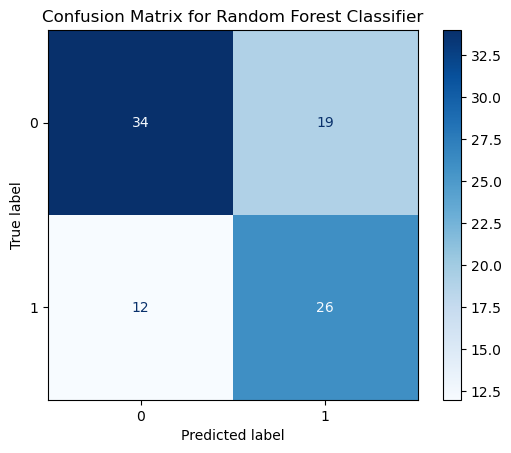

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [22]:
importances = model_rf.feature_importances_
importances

array([0.36910384, 0.28649414, 0.34440202])

In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.2f}")

Cross-validated accuracy: 0.67


In [24]:
#slight improvement with cross validated accuracy score
#let's try another hyperparameter tuning method

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best hyperparameters to use
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.72


In [26]:
#the model will perform the best with the above parameters
#now let's test it and fit the model to the test set

In [29]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.65


In [ ]:
#model doesn't perform better on test data